In [227]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
n_class = 10
X, y = load_digits(n_class=n_class , return_X_y=True)

In [3]:
X.shape

(1797, 64)

## Ce dataset contient 1797 exemples et 64 caracteristiques. Il represente des images de chiffre de 0 à 9 la tache sous jaccente est une tache de classification d'images

# 2. Implémentez les fonctions permettant :

In [4]:
def onehot_encoding(y, n_class):
    n = y.shape[0]
    y_one = np.zeros((n, n_class))
    for i in range(n):
       y_one[i, y[i]] = 1
    return y_one

In [38]:
def softmax(z):
    z -= np.max(z,axis=1, keepdims=True) # computational trick for numerical stability
    som=np.sum(np.exp(z))
    sm=np.exp(z) / som
    return sm

In [255]:
def get_prob_pred(X, W):
    z=X@W
    probs=np.max(softmax(z),axis=1)
    preds=np.argmax(softmax(z),axis=1)
    return probs , preds

# 4. Implémentez maintenant une fonction qui calcule la fonction de coût et le gradient.

In [163]:
def fonct_cout(X,Y,W,lambdaa):
    n=X.shape[0]
    z=X@W
    Y_pred=softmax(z)
    return  -np.sum(Y * np.log(Y_pred)) / n + (lambdaa / 2) * np.sum(W**2)
    

In [160]:
def gradient(X,Y,W,lambdaa):
    n=X.shape[0]
    z=X@W
    Y_pred=softmax(z)
    return  (-1/n) * (X.T @ (Y - Y_pred)) + lambdaa * W

In [206]:
def step_backtrak(X,y,w,direction,step,beta,lamb):
    c=1e-4
    f_x=fonct_cout(X,y,w,lamb)
    while(fonct_cout(X,y,w+step*direction,lamb)>f_x-c*step*np.sum(direction*direction)) :
        step=step*beta
    return step

In [240]:
def logreg_descent(X, y, learning_rate =1e-3,lamb=0.01, max_iter =1000,backtrak=True):
        n, d = X.shape
        X = np.concatenate ((X, np.ones((n, 1))), axis =1)
        w0 = np.random.randn(d+1,n_class)
        step = learning_rate
        beta = 0.9 
        cost=[]
        iteration=0
        Y=onehot_encoding(y,n_class)
        if backtrak==True:
           step=step_backtrak(X,Y,w0,-gradient(X, Y, w0,lamb),step,beta)
        w=w0-step*gradient(X, Y, w0,lamb)
        cost.append(fonct_cout(X, Y, w0,lamb))
        while np.linalg.norm(gradient(X, Y, w,lamb)) > 1e-3 and iteration<max_iter:
            if backtrak==True:
                step=step_backtrak(X,Y,w,-gradient(X, Y, w,lamb),step,beta)
            w=w-step*gradient(X, Y, w,lamb)
            iteration+=1
            cost.append(fonct_cout(X, Y, w,lamb))
        
        return cost,w[:-1,:]

In [228]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,stratify=y)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [270]:
cost,param=logreg_descent(X_train, Y_train, learning_rate =1e-3,lamb=0.5,max_iter =7000)

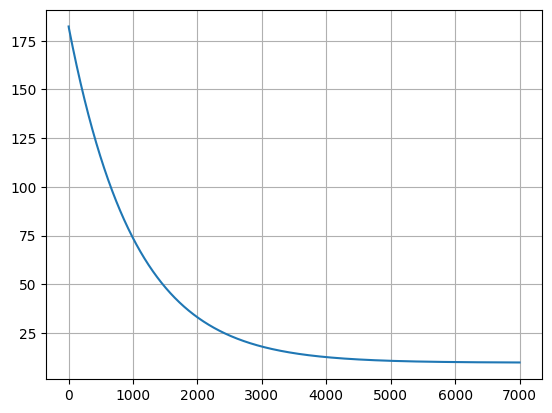

In [271]:
plt.plot(cost)
plt.grid()

In [272]:
_,pred=get_prob_pred(X_test, param)

In [273]:
taux=sum(np.array([1 if pred[i]==Y_test[i] else 0 for i in range(len(Y_test))]))/len(Y_test)

In [275]:
taux

np.float64(0.8462962962962963)